In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/palmer_penguins_openclassrooms.csv"
data = pd.read_csv(filename)

In [2]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Chinstrap,Dream,40.9,16.6,187.0,3200.0,female,2008
1,Adelie,Dream,36.5,18.0,182.0,3150.0,female,2007
2,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
3,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,male,2008
4,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,male,2007


In [3]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = data['bill_length_mm'].values.reshape(-1, 1)
y = data['body_mass_g']
reg.fit(X, y)

LinearRegression()

In [5]:
reg.score(X, y)

0.3474526112888374

In [6]:
X = data['bill_depth_mm'].values.reshape(-1, 1)
y = data['body_mass_g']
reg.score(X,y)

-8.632550813859112

In [7]:
X = data['flipper_length_mm'].values.reshape(-1, 1)
y = data['body_mass_g']
reg.score(X,y)

-286.78546125351943

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
pd.DataFrame(X,columns=['bill_length_mm','bill_depth_mm','flipper_length_mm'])

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,0.320000,0.416667,0.254237
1,0.160000,0.583333,0.169492
2,0.523636,0.571429,0.338983
3,0.807273,0.309524,1.000000
4,0.516364,0.321429,0.728814
...,...,...,...
328,0.723636,0.702381,0.423729
329,0.189091,0.559524,0.322034
330,0.414545,0.595238,0.508475
331,0.520000,0.654762,0.305085


In [9]:
reg.fit(X, y)
reg.score(X,y)

0.7639366781169293

In [10]:
y_pred = reg.predict(X)

In [11]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as RMSE
print('MAPE = ',MAPE(y_pred,y))
print('RMSE = ',RMSE(y_pred,y,squared=False))

MAPE =  0.0767630310100345
RMSE =  390.63708572458495


In [12]:
scaler = MinMaxScaler()
reg = LinearRegression()
for espece in ['Adelie', 'Gentoo', 'Chinstrap']:
    df = data[data.species == espece].copy()
    y = df['body_mass_g']
    X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
    reg.fit(X, y)
    print("--\n",espece, reg.score(X, y))

    y_pred = reg.predict(X)
    print(f"RMSE: {RMSE(y, y_pred)}")
    print(f"MAPE: {MAPE(y, y_pred)}")

--
 Adelie 0.5064249444393831
RMSE: 103103.77927187757
MAPE: 0.06885828804704647
--
 Gentoo 0.6280736371428206
RMSE: 92745.44334404983
MAPE: 0.04719861757681761
--
 Chinstrap 0.5038143982587501
RMSE: 72215.44695584573
MAPE: 0.05660976676978927


In [13]:
y = data['body_mass_g']
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
reg = LinearRegression()

--
 0.2 0.7902339700029893
--
 0.2 0.7655182716115203
--
 0.2 0.7196430740343782
--
 0.2 0.7495621198165494
--
 0.2 0.7336460599134988
--
 0.2 0.7961270129160324
--
 0.2 0.6418560512449538
--
 0.2 0.755487990247808
--
 0.2 0.8133016703593214
--
 0.2 0.680483138540001
--
 0.2 0.6272687154145724
--
 0.2 0.7671131457743382
--
 0.2 0.7651203791761058
--
 0.2 0.7689337714118285
--
 0.2 0.7472117375564093
--
 0.2 0.7770840059170852
--
 0.2 0.7112216784059651
--
 0.2 0.7535978217996375
--
 0.2 0.7549153245750057
--
 0.2 0.7835078402357276
--
 0.2 0.7773655289841006
--
 0.2 0.8547883306701634
--
 0.2 0.7629439441283142
--
 0.2 0.7557028647461884
--
 0.2 0.7745166199989916
--
 0.2 0.7645430635648752
--
 0.2 0.8004084043810878
--
 0.2 0.8057543127709843
--
 0.2 0.7339493370553274
--
 0.2 0.7626023125658626
--
 0.2 0.7563330660213223
--
 0.2 0.7331120338034255
--
 0.2 0.7854995113971788
--
 0.2 0.8295802312169773
--
 0.2 0.7143824118134441
--
 0.2 0.7198518136469174
--
 0.2 0.7811629426622876
--


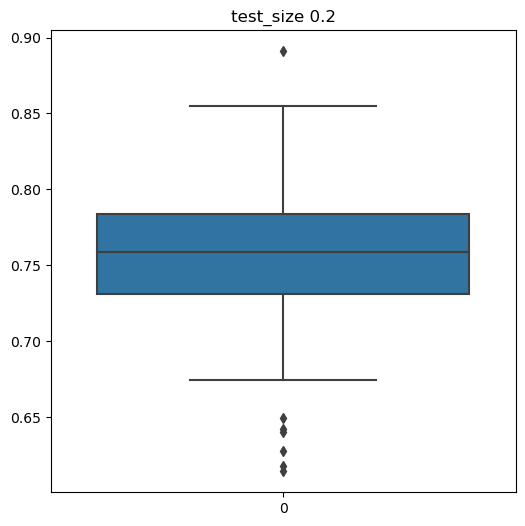

In [14]:
from sklearn.model_selection import train_test_split
import seaborn as sns
score = []

test_size =0.2
for random_state in np.arange(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    reg.fit(X_train, y_train)
    print("--\n",test_size, reg.score(X_test, y_test))
    score.append(reg.score(X_test, y_test))


fig = plt.figure(figsize=(6, 6))
sns.boxplot(score)
plt.title(f"test_size {test_size}");


In [15]:
filename = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/palmer_penguins_openclassrooms.csv"
data = pd.read_csv(filename)

In [16]:
data.loc[data.sex == 'male', 'sex'] = 0
data.loc[data.sex == 'female', 'sex'] = 1

data['sex'] = data.sex.astype('int')


In [23]:
data.sex.value_counts()

0    168
1    165
Name: sex, dtype: int64

In [24]:
scaler = MinMaxScaler()
y = data['sex'].values
X = scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
confusion_matrix(y_test, y_pred)

array([[23,  9],
       [ 3, 32]], dtype=int64)

In [37]:
tn, fp, fn, tp = np.ravel(confusion_matrix(y_test, y_pred))

In [40]:
tp

32

In [44]:
from sklearn.metrics import recall_score, precision_score
print('recall_score = ', recall_score(y_test, y_pred))
print('precision_score =', precision_score(y_test, y_pred))

recall_score =  0.9142857142857143
precision_score = 0.7804878048780488
